### Darshan Patel

# 1. Computer.csv Dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#  a. Study the dataset, identify the independent and target variables. 

In [21]:
df = pd.read_csv("Datasets/Computers.csv")
df

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [22]:
df = df.drop(columns=["Unnamed: 0"])      # We Droped index column as it is not needed in Regression model
df

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35


## Now Our dataset has 3 categorical variables named - cd, multi and premium.
## We need to convert this 3 categorical variables into numerical variables.
### where 0 indicates No  and 1 indicates Yes 

In [23]:
df["cd"] = df.cd.map(dict(yes=1, no=0))   # This code maps yes and no with 1 and 0 respectively for variable CD

df["multi"] = df.multi.map(dict(yes=1, no=0))

df["premium"] = df.premium.map(dict(yes=1, no=0))

df

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,0,0,1,39,35
6255,2223,66,850,16,15,1,1,1,39,35
6256,2654,100,1200,24,15,1,0,1,39,35
6257,2195,100,850,16,15,1,0,1,39,35


In [24]:
# Now we can see that all the variables are numeric so we can now feed this data to model.

In [25]:
# Identifying Independent and target Variables

# We will check correlation of features to select it.

In [59]:
corr = df.corr()
corr['price'][abs(corr['price']) > 0.1]

price     1.000000
speed     0.300976
hd        0.430258
ram       0.622748
screen    0.296041
cd        0.197343
trend    -0.199987
Name: price, dtype: float64

### From the above data we can clearly see that price of a computer is depends on the features like speed of the processor, screen resolution, Ram size, screen size, CD Drive and trends

### So here  Target variable is "Price"    where as 
### Independent Variables are  [ "speed", "hd",	"ram",	"screen",	"cd",  trend" ]

# b. Break down the dataset into training (70%) and testing (30%) groups and make sure these two groups do not share any common data point.

In [60]:
# NOw we assign Independent variabls in X and Target Variables in y

X = df.drop(columns=["price",'multi','premium','ads'])
y = df["price"]

In [61]:
# Dividing Data into training (70%) and testing(30%) sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Data is X_train, y_train
# Testing Data is  X_test,  y_test

# c. Applying Linear Regression

In [62]:
from sklearn import linear_model

model = linear_model.LinearRegression()

model.fit(X_train, y_train)  # fiting a multiple linear regression 
                            # on the training data using the target and independent variables

LinearRegression()

In [63]:
# We have Trained our multiple linear regression model using above code. Now we have to predict price using test set of
# Independent data values and Compare it with actual values.

# d.	Predict price using appropriate function in R (predict) or python on the testing group.

In [64]:
predicted_price  = model.predict(X_test)  # We predicted prices of test data and stored in Variable named "predicted_price" 


# e.	Calculate the error (predicted price – test price) and plot the histogram of error.

In [73]:
df1 = pd.DataFrame({"Actual Price":y_test,"Predicted Price":predicted_price,"Error":(predicted_price-y_test)})
# df1["Predicted Price"].round(decimals=0)
df1["Predicted Price"] = df1["Predicted Price"].astype(int)
df1["Error"] = df1["Error"].astype(int)

df1.head()

,Actual Price,Predicted Price,Error
2304,1578,1690,112
3621,2495,2725,230
5821,1790,2010,220
2707,2495,2378,-116
2596,1695,1719,24


(array([  4.,   9.,  18.,  19.,  24.,  36.,  76., 163., 352., 462., 385.,
        223.,  81.,  21.,   5.]),
 array([-1410.        , -1257.53333333, -1105.06666667,  -952.6       ,
         -800.13333333,  -647.66666667,  -495.2       ,  -342.73333333,
         -190.26666667,   -37.8       ,   114.66666667,   267.13333333,
          419.6       ,   572.06666667,   724.53333333,   877.        ]),
 <BarContainer object of 15 artists>)

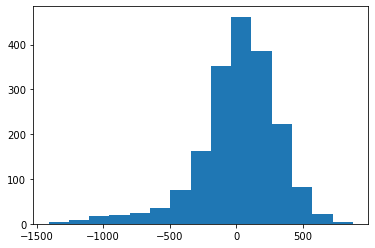

In [67]:
plt.hist(df1["Error"],bins=15)

# Here we calculated Error and plot histogram of Error in predicted price and Actual price

# f.	Calculate the Mean Square Error (MSE) and find the percentage of cases with less than 20% error.

In [68]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(df1["Actual Price"],df1["Predicted Price"])

print("Mean Square Error (MSE) is: ",MSE)

Mean Square Error (MSE) is:  95017.50053248137


In [72]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('Accuracy:',metrics.r2_score(y_train, model.predict(X_train))*100)

Accuracy: 69.89020688176042


# Applying Decesion Tree

In [74]:
from sklearn.tree import DecisionTreeRegressor
modeltree = DecisionTreeRegressor(max_depth=10,criterion='mse')

In [76]:
# Training model with Training Data set
modeltree.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=10)

In [77]:
prediction = modeltree.predict(X_test)

In [79]:
# Calculating MSE and Accuracy

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)

print("Mean Square Error (MSE) is: ",MSE)
print('Accuracy:',metrics.r2_score(y_train, modeltree.predict(X_train))*100)

Mean Square Error (MSE) is:  54591.90326652616
Accuracy: 89.65821160002963


In [80]:
df2 = pd.DataFrame({"Actual Price":y_test,"Predicted Price":prediction,"Error":(prediction-y_test)})
df2["Predicted Price"] = df2["Predicted Price"].astype(int)
df2["Error"] = df2["Error"].astype(int)

df2.head()

,Actual Price,Predicted Price,Error
2304,1578,1539,-38
3621,2495,2570,75
5821,1790,1751,-38
2707,2495,2682,187
2596,1695,1720,25


(array([  1.,   4.,  12.,  20.,  50., 177., 583., 711., 223.,  64.,  21.,
          3.,   3.,   3.,   3.]),
 array([-1260.        , -1081.33333333,  -902.66666667,  -724.        ,
         -545.33333333,  -366.66666667,  -188.        ,    -9.33333333,
          169.33333333,   348.        ,   526.66666667,   705.33333333,
          884.        ,  1062.66666667,  1241.33333333,  1420.        ]),
 <BarContainer object of 15 artists>)

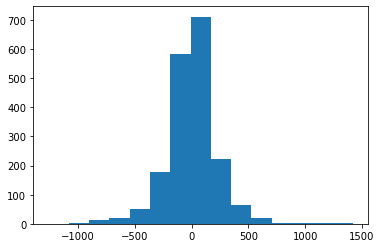

In [81]:
plt.hist(df2["Error"],bins=15)

# Here we calculated Error and plot histogram of Error in predicted price and Actual price

In [82]:
finaldf = pd.DataFrame(X_test)
finaldf['Price'] = y_test
finaldf['Predicted_price']=df2['Predicted Price']
finaldf['Error'] = df2['Error']
finaldf['Error in %'] = round(abs((finaldf['Error']/finaldf['Price'])*100),2)
finaldf

,speed,hd,ram,screen,cd,trend,Price,Predicted_price,Error,Error in %
2304,25,120,4,14,0,12,1578,1539,-38,2.41
3621,100,540,8,15,1,17,2495,2570,75,3.01
5821,66,730,8,15,1,28,1790,1751,-38,2.12
2707,66,426,8,14,1,14,2495,2682,187,7.49
2596,33,214,4,14,0,14,1695,1720,25,1.47
...,...,...,...,...,...,...,...,...,...,...
192,33,213,8,14,0,3,1999,2332,333,16.66
4359,33,528,8,14,1,20,1993,2078,85,4.26
1126,66,452,8,14,1,8,3794,3688,-105,2.77
2135,50,426,8,14,0,12,2444,2471,27,1.10


In [84]:
lessdf = finaldf[finaldf['Error in %']<20]
lessdf

,speed,hd,ram,screen,cd,trend,Price,Predicted_price,Error,Error in %
2304,25,120,4,14,0,12,1578,1539,-38,2.41
3621,100,540,8,15,1,17,2495,2570,75,3.01
5821,66,730,8,15,1,28,1790,1751,-38,2.12
2707,66,426,8,14,1,14,2495,2682,187,7.49
2596,33,214,4,14,0,14,1695,1720,25,1.47
...,...,...,...,...,...,...,...,...,...,...
192,33,213,8,14,0,3,1999,2332,333,16.66
4359,33,528,8,14,1,20,1993,2078,85,4.26
1126,66,452,8,14,1,8,3794,3688,-105,2.77
2135,50,426,8,14,0,12,2444,2471,27,1.10


In [98]:
print("Shape of finaldf: ",finaldf.shape)
print("Shape of lessdf: ",lessdf.shape)
a = finaldf.shape
b= lessdf.shape

print("Total Percentage of cases with less than 20% error: ",(b[0]/a[0])*100)

Shape of finaldf:  (1878, 10)
Shape of lessdf:  (1734, 10)
Total Percentage of cases with less than 20% error:  92.33226837060703


### the percentage of cases with less than 20% error is 92.33 %

# 2.	yelp.csv  Dataset 

#  a. Study the dataset, identify the independent and target variables. 

In [100]:
df2 = pd.read_csv("Datasets/yelp_lab8.csv")
df2

,city,stars,review_count,categories
0,Toronto,0,12,Italian
1,Toronto,0,39,Pub
2,Toronto,1,3,Coffee or Sandwiches
3,Toronto,1,55,Middle Eastern
4,Markham,0,80,Asian
...,...,...,...,...
9214,Toronto,0,4,Middle Eastern
9215,Toronto,1,15,Other
9216,Toronto,0,12,Asian
9217,Toronto,1,4,Middle Eastern


###  Here Stars is a rating of a restaurant which is Target Variable because it depends on features like location, category of a restaurant and number of people gave their reviews.

### Target variable --> Stars
### Independent variables --> city,	review_count, categories

In [101]:
# Here we have 2 categorical variables 'city' and 'categories'.
# we create dummy variables to convert this categorical variables into numeric variables

In [102]:
dummy1=pd.get_dummies(df2['city'])
dummy2 = pd.get_dummies(df2['categories'])
df2 = df2.merge(dummy1,left_index=True,right_index=True)
df2 = df2.merge(dummy2,left_index=True,right_index=True)

df2 = df2.drop(columns = ['city','categories'])
df2.head(10)

# We sucessfully converted categorical variables into numeric vbariables 

,stars,review_count,Markham,Missisauga,Toronto,Asian,Coffee or Sandwiches,Fast Food,Italian,Latin,Middle Eastern,North American,Other,Pub
0,0,12,0,0,1,0,0,0,1,0,0,0,0,0
1,0,39,0,0,1,0,0,0,0,0,0,0,0,1
2,1,3,0,0,1,0,1,0,0,0,0,0,0,0
3,1,55,0,0,1,0,0,0,0,0,1,0,0,0
4,0,80,1,0,0,1,0,0,0,0,0,0,0,0
5,0,5,0,0,1,1,0,0,0,0,0,0,0,0
6,0,6,0,0,1,1,0,0,0,0,0,0,0,0
7,0,6,0,0,1,0,0,0,0,0,0,1,0,0
8,0,34,0,0,1,0,0,0,0,0,1,0,0,0
9,1,8,1,0,0,0,0,1,0,0,0,0,0,0


# b.	Set 1, 1.5, 2, 2.5, 3, 3.5 stars to 0 indicating failure and 4, 4.5, 5 stars to 1 indicating success.

# There in no star values other than 0 and 1 to set them as success and failure,
# However below is the code which can set values according to requirements.

In [103]:
#  df2["stars"] = df2.stars.map(dict(1 = 0, 1.5 = 0, 2 = 0, 2.5 = 0, 3 = 0, 3.5 = 0,4 = 1, 4.5 = 1, 5 = 1))  

# This code set values of  1, 1.5, 2, 2.5, 3, 3.5 stars as 0 and 4, 4.5, 5 stars as 1,
# where 0 indicates Failure and 1 Indicates Success

# c.	Break down the dataset into training (70%) and testing (30%) groups.

In [104]:
# NOw we assign Independent variabls in X and Target Variables in y

X = df2.drop(columns=["stars"])
y = df2["stars"]

In [105]:
# Dividing Data into training (70%) and testing(30%) sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Training Data is X_train, y_train
# Testing Data is  X_test,  y_test

# d.	Write a code to create a logistic regression for rating.

In [106]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)  # Applying Logistic Regression ,for Rating, 
                            # on the training data using the target and independent variables

LogisticRegression()

# e.	Predict rating using appropriate function in R (predict) or python on the testing group.

In [107]:
y_pred  = model.predict(X_test)  # We predicted star rating of test data 

In [108]:
df3 = pd.DataFrame(({"Actual Star Rating":y_test,"Predicted Star Rating":y_pred}))
df3.head(10)

,Actual Star Rating,Predicted Star Rating
3503,0,0
7971,1,0
4231,0,0
6656,1,1
2610,1,0
2945,0,0
8525,0,0
6394,0,0
2734,1,0
8842,0,0


In [110]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuiracy score of model is: ",accuracy*100)

Accuiracy score of model is:  66.37744034707158


# 3.	Use Prostate_Cancer.csv 

## a.	Check the dataset for any missing values and prepare it for analysis.

In [111]:
df4 = pd.read_csv("Datasets/Prostate_Cancer.csv")
df4.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [112]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [113]:
df4.isnull().sum()   # This code clearly shows sum of missing values if there is any..

# We can see that there is no missing values. Our Data is clean.

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [114]:
# Now we prepare this data for analysis 
# We will convert categorical variable into numeric one 
# where 0 indicates B(Benign) and 1 Indicate(Malignant).


df4['diagnosis_result'] = df4.diagnosis_result.map(dict(B=0,M=1))
df4 = df4.drop(columns = ['id'])
df4

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,1,23,16,132,1264,0.091,0.131,0.210,0.056
96,0,22,14,78,451,0.105,0.071,0.190,0.066
97,0,19,27,62,295,0.102,0.053,0.135,0.069
98,0,21,24,74,413,0.090,0.075,0.162,0.066


In [121]:
# We can see that above data is now ready for analysis
# Target variable is "diagnosis_result"
# Independent variables are [radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension]

In [120]:
x = df4.drop(columns = 'diagnosis_result')
y = df4['diagnosis_result']

# b.	Normalized the dataset.

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized = pd.DataFrame(scaler.fit_transform(x),columns=['radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'])
normalized

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364
...,...,...,...,...,...,...,...,...
95,0.8750,0.3125,0.666667,0.633652,0.287671,0.302932,0.443787,0.068182
96,0.8125,0.1875,0.216667,0.148568,0.479452,0.107492,0.325444,0.295455
97,0.6250,1.0000,0.083333,0.055489,0.438356,0.048860,0.000000,0.363636
98,0.7500,0.8125,0.183333,0.125895,0.273973,0.120521,0.159763,0.295455


In [125]:
# We can see that above data is normalized 

# c.	Break down the dataset into training (70%) and testing (30%) groups.


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Training Data is X_train, y_train
# Testing Data is  X_test,  y_test

print("shape of X_train :",X_train.shape)
print("shape of X_test :",X_test.shape)
print("shape of y_train :",y_train.shape)
print("shape of y_test :",y_test.shape)

shape of X_train : (70, 8)
shape of X_test : (30, 8)
shape of y_train : (70,)
shape of y_test : (30,)


# d.	Use KNN algorithm to predict the cancer.

In [128]:
from sklearn.neighbors import KNeighborsClassifier

knnmodel = KNeighborsClassifier(n_neighbors=3)


In [129]:
# Train the model using the training sets

knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [130]:
#Predict Output

predicted = knnmodel.predict(X_test) 
print(predicted)

[1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1]


In [132]:
output = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
output.head()

,Actual,Predicted
26,1,1
86,1,1
2,1,1
55,0,0
75,1,1


# e.	Comment on the model performance. 

In [140]:
# Lets find the accuracy and r score of model

accuracy = accuracy_score(y_test,predicted)
print("Accuracy of KNN model is :",accuracy*100)
print()

MSE = mean_squared_error(y_test,predicted)
print("Mean Square Error (MSE) is: ",MSE)

Accuracy of KNN model is : 83.33333333333334

Mean Square Error (MSE) is:  0.16666666666666666


### We can see that model predicted 83.33 % correctly. so we can say the Accuracy of KNN model is 83.33 %.